<a href="https://colab.research.google.com/github/AnujRawat42/DA_Project_1/blob/main/DA_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [4]:
df=pd.read_csv("/content/drive/MyDrive/colab files/naukri_com-job_sample.csv")  # Reading the data
df.head(4)

,company,education,experience,industry,jobdescription,jobid,joblocation_address,jobtitle,numberofpositions,payrate,postdate,site_name,skills,uniq_id
0,MM Media Pvt Ltd,UG: B.Tech/B.E. - Any Specialization PG:Any Po...,0 - 1 yrs,Media / Entertainment / Internet,Job Description Send me Jobs like this Quali...,210516002263,Chennai,Walkin Data Entry Operator (night Shift),NaN,"1,50,000 - 2,25,000 P.A",2016-05-21 19:30:00 +0000,NaN,ITES,43b19632647068535437c774b6ca6cf8
1,find live infotech,UG: B.Tech/B.E. - Any Specialization PG:MBA/PG...,0 - 0 yrs,Advertising / PR / MR / Event Management,Job Description Send me Jobs like this Quali...,210516002391,Chennai,Work Based Onhome Based Part Time.,60.0,"1,50,000 - 2,50,000 P.A. 20000",2016-05-21 19:30:00 +0000,NaN,Marketing,d4c72325e57f89f364812b5ed5a795f0
2,Softtech Career Infosystem Pvt. Ltd,UG: Any Graduate - Any Specialization PG:Any P...,4 - 8 yrs,IT-Software / Software Services,Job Description Send me Jobs like this - as ...,101016900534,Bengaluru,Pl/sql Developer - SQL,NaN,Not Disclosed by Recruiter,2016-10-13 16:20:55 +0000,NaN,IT Software - Application Programming,c47df6f4cfdf5b46f1fd713ba61b9eba
3,Onboard HRServices LLP,UG: Any Graduate - Any Specialization PG:CA Do...,11 - 15 yrs,Banking / Financial Services / Broking,Job Description Send me Jobs like this - Inv...,81016900536,"Mumbai, Bengaluru, Kolkata, Chennai, Coimbator...",Manager/ad/partner - Indirect Tax - CA,NaN,Not Disclosed by Recruiter,2016-10-13 16:20:55 +0000,NaN,Accounts,115d28f140f694dd1cc61c53d03c66ae


In [5]:
df.columns

Index(['company', 'education', 'experience', 'industry', 'jobdescription',
       'jobid', 'joblocation_address', 'jobtitle', 'numberofpositions',
       'payrate', 'postdate', 'site_name', 'skills', 'uniq_id'],
      dtype='object')

In [6]:
df.shape

(22000, 14)

## Cleaning the payrate column feature:

---



In [7]:
payrate_split=df['payrate'].str.split('-',expand=True)  # Spliting the pairs of payrate
payrate_split


,0,1,2,3,4,5,6
0,"1,50,000","2,25,000 P.A",None,None,None,None,None
1,"1,50,000","2,50,000 P.A. 20000",None,None,None,None,None
2,Not Disclosed by Recruiter,None,None,None,None,None,None
3,Not Disclosed by Recruiter,None,None,None,None,None,None
4,Not Disclosed by Recruiter,None,None,None,None,None,None
...,...,...,...,...,...,...,...
21995,Not Disclosed by Recruiter,None,None,None,None,None,None
21996,"8,50,000","14,00,000 P.A",None,None,None,None,None
21997,Not Disclosed by Recruiter,None,None,None,None,None,None
21998,Not Disclosed by Recruiter,None,None,None,None,None,None


In [8]:
 # Removing the (,) and additional space from the Payrate Feature
payrate_split[0]=payrate_split[0].str.replace(',','')    
payrate_split[1]=payrate_split[1].str.strip() 
payrate_split[1]=payrate_split[1].apply(lambda x:str(x).replace(',',''))

In [9]:
#  Removing text using pattern 
pattern='\D.*'
payrate_split[0]=payrate_split[0].str.replace(pattern,'')
payrate_split[1]=payrate_split[1].str.replace(pattern,'')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.


In [10]:
payrate_split[0]=pd.to_numeric(payrate_split[0],errors='coerce')  # Converting the values into float
payrate_split[1]=pd.to_numeric(payrate_split[1],errors='coerce')  # Converting the values into float

In [11]:
payrate_split.loc[:,[0,1]]

,0,1
0,150000.0,225000.0
1,150000.0,250000.0
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
21995,NaN,NaN
21996,850000.0,1400000.0
21997,NaN,NaN
21998,NaN,NaN


In [12]:
df['min_pay']=payrate_split[0]  # Renaming the new splitted columns
df['max_pay']=payrate_split[1]
df['avg_pay']=(df['min_pay']+df['max_pay'])/2  # Calculating Average payrate

## Cleaning the Experience feature

---






In [13]:
''' Creating a function to handle all the values 
 which are occuring more than 2 times as 
 experience can only contains 2 values. eg= 0-1 yrs'''

def split_exp(exp):                       
  try:
      if len(exp.split('-'))==2:
          min_exp=exp.split('-')[0]
          max_exp=exp.split('-')[1]
      return pd.Series([min_exp,max_exp])
  except:
      return pd.Series([np.nan,np.nan])

In [14]:
df[['min_exp','max_exp']]=df['experience'].apply(split_exp).rename(columns={0:'min_exp',1:'max_exp'})  # Applying the function

In [15]:
df['max_exp']=df['max_exp'].str.replace('yrs',' ')  # Replacing 'yrs'

In [16]:
df.loc[:,['min_exp','max_exp']]

,min_exp,max_exp
0,0,1
1,0,0
2,4,8
3,11,15
4,6,8
...,...,...
21995,9,13
21996,3,5
21997,2,4
21998,7,12


In [17]:
# Coverting max and min_pay into float
df['min_exp']=df['min_exp'].astype(float)
df['max_exp']=df['max_exp'].astype(float)

In [18]:
df.dtypes

company                 object
education               object
experience              object
industry                object
jobdescription          object
jobid                    int64
joblocation_address     object
jobtitle                object
numberofpositions      float64
payrate                 object
postdate                object
site_name               object
skills                  object
uniq_id                 object
min_pay                float64
max_pay                float64
avg_pay                float64
min_exp                float64
max_exp                float64
dtype: object

## Cleaning the date feature

---



---



In [19]:
# Converting the postdate datatype to datetime64
df['postdate']=pd.to_datetime(df['postdate'])

In [20]:
def fetch(x):
  return([x.day,x.month,x.year])

In [21]:
date=pd.DataFrame(map(fetch,df['postdate'])).rename(columns={0:'day',1:'month',2:'year'}) # Converting it into a DataFrame
date

,day,month,year
0,21.0,5.0,2016.0
1,21.0,5.0,2016.0
2,13.0,10.0,2016.0
3,13.0,10.0,2016.0
4,13.0,10.0,2016.0
...,...,...,...
21995,25.0,11.0,2016.0
21996,24.0,11.0,2016.0
21997,25.0,11.0,2016.0
21998,27.0,11.0,2016.0


In [22]:
df=pd.concat([df,date],axis=1) # Concating the Date with our main dataframe
df.head(5)

,company,education,experience,industry,jobdescription,jobid,joblocation_address,jobtitle,numberofpositions,payrate,...,skills,uniq_id,min_pay,max_pay,avg_pay,min_exp,max_exp,day,month,year
0,MM Media Pvt Ltd,UG: B.Tech/B.E. - Any Specialization PG:Any Po...,0 - 1 yrs,Media / Entertainment / Internet,Job Description Send me Jobs like this Quali...,210516002263,Chennai,Walkin Data Entry Operator (night Shift),NaN,"1,50,000 - 2,25,000 P.A",...,ITES,43b19632647068535437c774b6ca6cf8,150000.0,225000.0,187500.0,0.0,1.0,21.0,5.0,2016.0
1,find live infotech,UG: B.Tech/B.E. - Any Specialization PG:MBA/PG...,0 - 0 yrs,Advertising / PR / MR / Event Management,Job Description Send me Jobs like this Quali...,210516002391,Chennai,Work Based Onhome Based Part Time.,60.0,"1,50,000 - 2,50,000 P.A. 20000",...,Marketing,d4c72325e57f89f364812b5ed5a795f0,150000.0,250000.0,200000.0,0.0,0.0,21.0,5.0,2016.0
2,Softtech Career Infosystem Pvt. Ltd,UG: Any Graduate - Any Specialization PG:Any P...,4 - 8 yrs,IT-Software / Software Services,Job Description Send me Jobs like this - as ...,101016900534,Bengaluru,Pl/sql Developer - SQL,NaN,Not Disclosed by Recruiter,...,IT Software - Application Programming,c47df6f4cfdf5b46f1fd713ba61b9eba,NaN,NaN,NaN,4.0,8.0,13.0,10.0,2016.0
3,Onboard HRServices LLP,UG: Any Graduate - Any Specialization PG:CA Do...,11 - 15 yrs,Banking / Financial Services / Broking,Job Description Send me Jobs like this - Inv...,81016900536,"Mumbai, Bengaluru, Kolkata, Chennai, Coimbator...",Manager/ad/partner - Indirect Tax - CA,NaN,Not Disclosed by Recruiter,...,Accounts,115d28f140f694dd1cc61c53d03c66ae,NaN,NaN,NaN,11.0,15.0,13.0,10.0,2016.0
4,Spire Technologies and Solutions Pvt. Ltd.,UG: B.Tech/B.E. - Any Specialization PG:Any Po...,6 - 8 yrs,IT-Software / Software Services,Job Description Send me Jobs like this Pleas...,120916002122,Bengaluru,JAVA Technical Lead (6-8 yrs) -,4.0,Not Disclosed by Recruiter,...,IT Software - Application Programming,a12553fc03bc7bcced8b1bb8963f97b4,NaN,NaN,NaN,6.0,8.0,13.0,10.0,2016.0


## deleting the unnecessary columns

---






In [23]:
def drop(col):   # Creating a function to delete Columns
  df.drop(col,axis=1,inplace=True)

In [24]:
df.columns


Index(['company', 'education', 'experience', 'industry', 'jobdescription',
       'jobid', 'joblocation_address', 'jobtitle', 'numberofpositions',
       'payrate', 'postdate', 'site_name', 'skills', 'uniq_id', 'min_pay',
       'max_pay', 'avg_pay', 'min_exp', 'max_exp', 'day', 'month', 'year'],
      dtype='object')

In [25]:
# Deleting All the unnecessary
drop('payrate')
drop('uniq_id')
drop('postdate')
drop('jobid')
drop('experience')

In [26]:
df.head(5)

,company,education,industry,jobdescription,joblocation_address,jobtitle,numberofpositions,site_name,skills,min_pay,max_pay,avg_pay,min_exp,max_exp,day,month,year
0,MM Media Pvt Ltd,UG: B.Tech/B.E. - Any Specialization PG:Any Po...,Media / Entertainment / Internet,Job Description Send me Jobs like this Quali...,Chennai,Walkin Data Entry Operator (night Shift),NaN,NaN,ITES,150000.0,225000.0,187500.0,0.0,1.0,21.0,5.0,2016.0
1,find live infotech,UG: B.Tech/B.E. - Any Specialization PG:MBA/PG...,Advertising / PR / MR / Event Management,Job Description Send me Jobs like this Quali...,Chennai,Work Based Onhome Based Part Time.,60.0,NaN,Marketing,150000.0,250000.0,200000.0,0.0,0.0,21.0,5.0,2016.0
2,Softtech Career Infosystem Pvt. Ltd,UG: Any Graduate - Any Specialization PG:Any P...,IT-Software / Software Services,Job Description Send me Jobs like this - as ...,Bengaluru,Pl/sql Developer - SQL,NaN,NaN,IT Software - Application Programming,NaN,NaN,NaN,4.0,8.0,13.0,10.0,2016.0
3,Onboard HRServices LLP,UG: Any Graduate - Any Specialization PG:CA Do...,Banking / Financial Services / Broking,Job Description Send me Jobs like this - Inv...,"Mumbai, Bengaluru, Kolkata, Chennai, Coimbator...",Manager/ad/partner - Indirect Tax - CA,NaN,NaN,Accounts,NaN,NaN,NaN,11.0,15.0,13.0,10.0,2016.0
4,Spire Technologies and Solutions Pvt. Ltd.,UG: B.Tech/B.E. - Any Specialization PG:Any Po...,IT-Software / Software Services,Job Description Send me Jobs like this Pleas...,Bengaluru,JAVA Technical Lead (6-8 yrs) -,4.0,NaN,IT Software - Application Programming,NaN,NaN,NaN,6.0,8.0,13.0,10.0,2016.0


## Performing the descriptive analysis

---






In [27]:
df.describe().T # decriptive statistics of Numerical Data

,count,mean,std,min,25%,50%,75%,max
numberofpositions,4464.0,45.116935,186.197193,1.0,2.0,4.0,10.0,2000.0
min_pay,4679.0,450353.288737,561228.358108,8.0,150000.0,250000.0,500000.0,5500000.0
max_pay,4940.0,734296.389879,755978.023020,1.0,300000.0,500000.0,900000.0,8000000.0
avg_pay,4641.0,614848.642426,644207.322793,9.0,250000.0,375000.0,750000.0,6500000.0
min_exp,21884.0,3.600987,3.100532,0.0,2.0,3.0,5.0,26.0
max_exp,21884.0,7.117803,3.923900,0.0,5.0,7.0,9.0,30.0
day,21977.0,18.849934,9.751744,1.0,9.0,22.0,29.0,31.0
month,21977.0,7.224189,4.062145,1.0,3.0,8.0,11.0,12.0
year,21977.0,2015.750648,0.450577,2015.0,2015.0,2016.0,2016.0,2017.0


In [28]:
df.describe(include=['O']).T   # decriptive statistics of Categorical Data

,count,unique,top,freq
company,21996,8469,Indian Institute of Technology Bombay,403
education,20004,2355,"UG: Any Graduate - Any Specialization, Graduat...",2015
industry,21995,63,IT-Software / Software Services,9216
jobdescription,21996,21063,Job Description Send me Jobs like this Adver...,121
joblocation_address,21499,2329,Bengaluru/Bangalore,3775
jobtitle,22000,17564,Business Development Executive,93
site_name,3987,1,www.naukri.com,3987
skills,21472,45,IT Software - Application Programming,5989


In [29]:
categorical = [col for col in df.columns if df[col].dtype=='object']  # Finding all the Categorical columns
print(categorical)

['company', 'education', 'industry', 'jobdescription', 'joblocation_address', 'jobtitle', 'site_name', 'skills']


In [30]:
numerical = [col for col in df.columns if df[col].dtype!='object']     # Finding all the Numerical columns
print(numerical)

['numberofpositions', 'min_pay', 'max_pay', 'avg_pay', 'min_exp', 'max_exp', 'day', 'month', 'year']


Text(0.5, 1.0, 'HeatMap of Jobmarket in India')

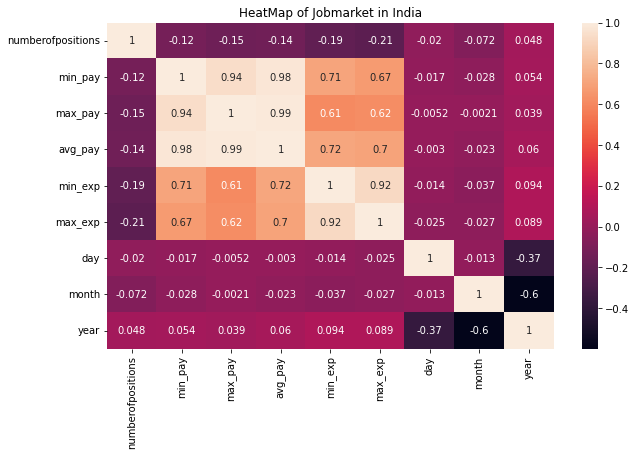

In [31]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)
plt.title('HeatMap of Jobmarket in India')

In [32]:
data=df.copy()   # making a copy to reduce the complexity in df dataframe

In [33]:
data['company'].value_counts().head(10)

Indian Institute of Technology Bombay           403
Confidential                                    393
National Institute of Industrial Engineering    185
Oracle India Pvt. Ltd.                          151
JPMorgan Chase                                  135
Godrej Industries Ltd                           125
Unitforce technologies Pvt. Ltd.                100
Capgemini                                        98
HCL Technologies                                 95
Axis Jobs                                        92
Name: company, dtype: int64

Text(0.5, 1.0, 'TOP TEN COMAPNIES WITH MOST NUMBER OF JOBS')

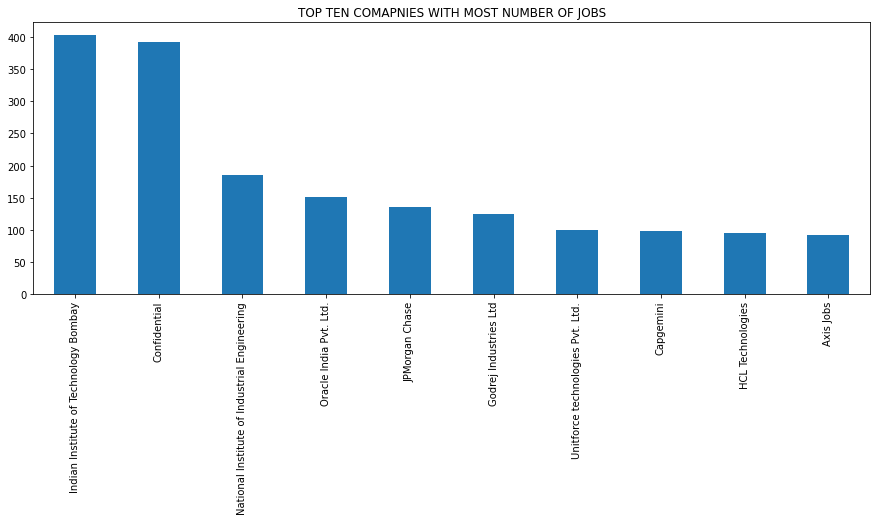

In [34]:
plt.figure(figsize=(15,5))
data['company'].value_counts().head(10).plot(kind='bar')
plt.title('TOP TEN COMAPNIES WITH MOST NUMBER OF JOBS')

In [35]:
data['industry'].value_counts().head(10)

IT-Software / Software Services                  9216
Education / Teaching / Training                  1322
BPO / Call Centre / ITES                         1254
Banking / Financial Services / Broking           1238
Recruitment / Staffing                           1129
Internet / Ecommerce                              738
Pharma / Biotech / Clinical Research              525
Medical / Healthcare / Hospitals                  495
Automobile / Auto Anciliary / Auto Components     478
Construction / Engineering / Cement / Metals      449
Name: industry, dtype: int64

Text(0.5, 1.0, 'TOP 10 DEMANDED INDUSTRIES IN INDIA')

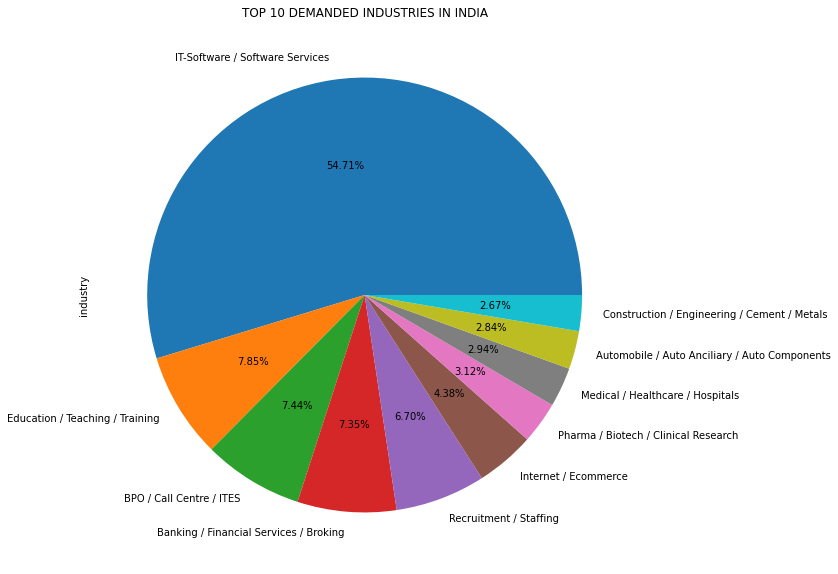

In [36]:
plt.figure(figsize=(20,10))
data['industry'].value_counts().head(10).plot(kind='pie',autopct='%.2f%%')
plt.title('TOP 10 DEMANDED INDUSTRIES IN INDIA')

Text(0.5, 1.0, 'TOP 10 DEMANDED SKILLS IN INDIA')

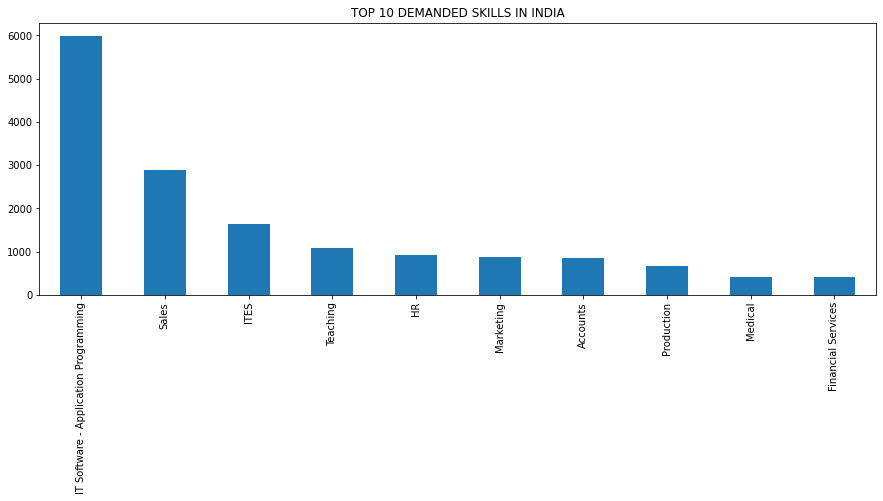

In [37]:
plt.figure(figsize=(15,5))
data['skills'].value_counts().head(10).plot(kind = 'bar')
plt.title('TOP 10 DEMANDED SKILLS IN INDIA')

In [38]:
# Replacing all the reoccuring cities 

replacements = {
   'joblocation_address': {
      r'(Bengaluru/Bangalore)': 'Bangalore',
      r'Bengaluru': 'Bangalore',
      r'Hyderabad / Secunderabad': 'Hyderabad',
      r'Mumbai , Mumbai': 'Mumbai',
      r'Noida': 'NCR',
      r'Delhi': 'NCR',
      r'Gurgaon': 'NCR', 
      r'Delhi/NCR(National Capital Region)': 'NCR',
      r'Delhi , Delhi': 'NCR',
      r'Noida , Noida/Greater Noida': 'NCR',
      r'Ghaziabad': 'NCR',
      r'Delhi/NCR(National Capital Region) , Gurgaon': 'NCR',
      r'NCR , NCR': 'NCR',
      r'NCR/NCR(National Capital Region)': 'NCR',
      r'NCR , NCR/Greater NCR': 'NCR',
      r'NCR/NCR(National Capital Region) , NCR': 'NCR', 
      r'NCR , NCR/NCR(National Capital Region)': 'NCR', 
      r'Bangalore , Bangalore / Bangalore': 'Bangalore',
      r'Bangalore , karnataka': 'Bangalore',
      r'NCR/NCR(National Capital Region)': 'NCR',
      r'NCR/Greater NCR': 'NCR',
      r'NCR/NCR(National Capital Region) , NCR': 'NCR'
       
   }
}

data.replace(replacements, regex=True, inplace=True)

In [39]:
data['joblocation_address'].value_counts().head(10)

Bangalore                                 5289
Mumbai                                    2862
NCR                                       2383
Hyderabad                                 2182
Chennai                                   1204
NCR , NCR                                  548
NCR/NCR(National Capital Region)           383
Bangalore , Bangalore / Bangalore          360
NCR , NCR/Greater NCR                      313
NCR/NCR(National Capital Region) , NCR     156
Name: joblocation_address, dtype: int64

Text(0.5, 1.0, 'TOP CITIES OF MOST NUMBER OF JOBS')

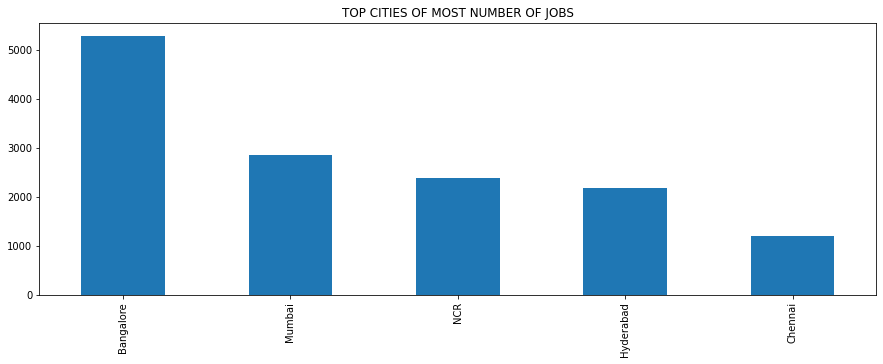

In [40]:
plt.figure(figsize=(15,5))
data['joblocation_address'].value_counts().head(5).plot(kind='bar')
plt.title('TOP CITIES OF MOST NUMBER OF JOBS')

Text(0.5, 1.0, 'TOP 5 JOB TITLES IN INDIA')

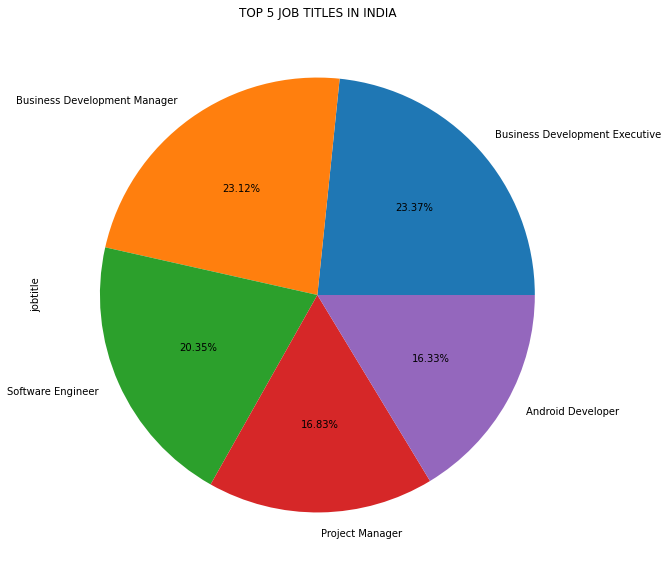

In [41]:
plt.figure(figsize=(20,10))
data['jobtitle'].value_counts().head(5).plot(kind='pie',autopct='%.2f%%')
plt.title('TOP 5 JOB TITLES IN INDIA')

Text(0.5, 1.0, 'Stripplots between min_exp & min_exp')

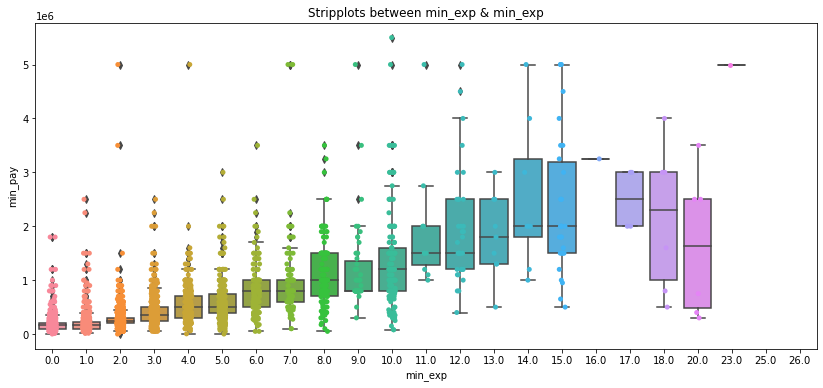

In [42]:
plt.figure(figsize=(14,6))
sns.stripplot(x='min_exp',y='min_pay',data=data)
sns.boxplot(x='min_exp',y='min_pay',data=data)
plt.title('Stripplots between min_exp & min_exp')

Text(0.5, 1.0, 'Stripplots between max_exp & max_exp')

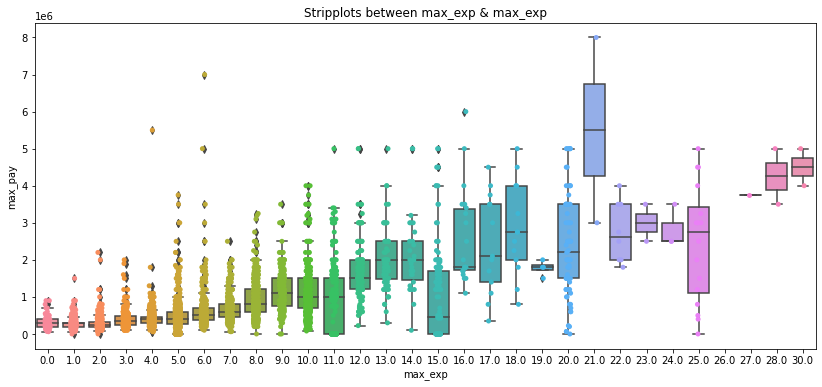

In [43]:
plt.figure(figsize=(14,6))
sns.stripplot(x='max_exp',y='max_pay',data=data)
sns.boxplot(x='max_exp',y='max_pay',data=data)
plt.title('Stripplots between max_exp & max_exp')

Text(0.5, 1.0, 'TOP 10 INDUSTRY WITH MAXIMUM PAY')

<Figure size 1080x360 with 0 Axes>

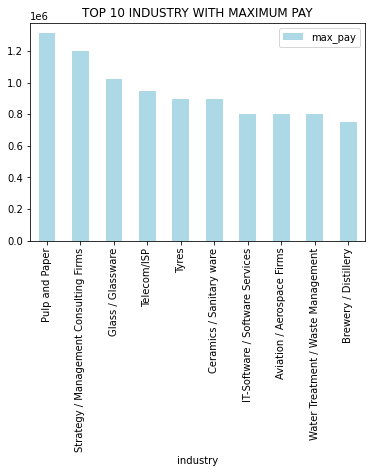

In [44]:
plt.figure(figsize=(15,5))
data[['max_pay','industry']].groupby(["industry"]).median().sort_values(by='max_pay',ascending=False).head(10).plot.bar(color='lightblue')
plt.title('TOP 10 INDUSTRY WITH MAXIMUM PAY')

Text(0.5, 1.0, 'TOP 10 SKILLS WITH MAXIMUM AVERAGE PAY')

<Figure size 1080x360 with 0 Axes>

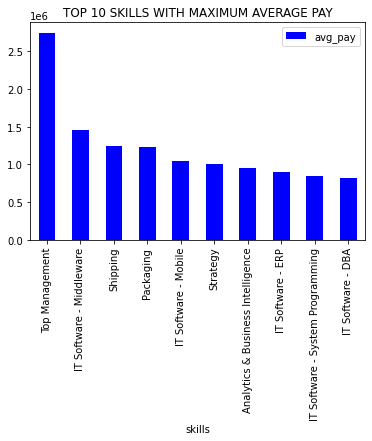

In [45]:
plt.figure(figsize=(15,5))
data[['avg_pay','skills']].groupby(["skills"]).median().sort_values(by='avg_pay',ascending=False).head(10).plot.bar(color='blue')
plt.title('TOP 10 SKILLS WITH MAXIMUM AVERAGE PAY')

Text(0.5, 1.0, 'TOP 5 INDUSTRY WITH MOST NUMBER OF VACANCIES')

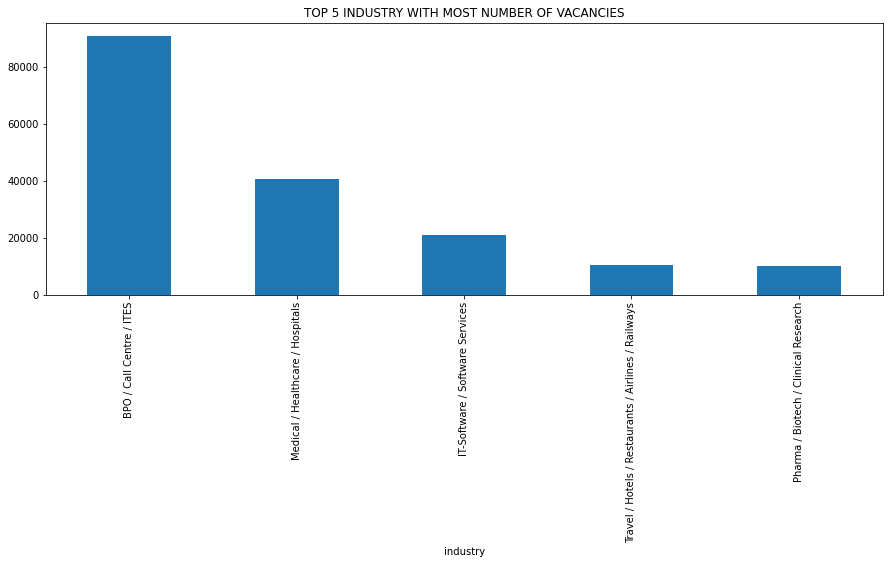

In [46]:
plt.figure(figsize=(15,5))
data.groupby('industry')['numberofpositions'].sum().sort_values(ascending=False).head(5).plot(kind='bar')
plt.title('TOP 5 INDUSTRY WITH MOST NUMBER OF VACANCIES')